# CH02 1차원 데이터

In [5]:
import numpy as np
import pandas as pd

# 출력을 소수점 이하 3자리로 제한(Jupyter Notebook)
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision',3)

#데이터(학생 50명의 영어, 수학 점수) 입력
df = pd.read_csv('scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [6]:
# 학번 순서대로 10명의 영어 점수를 array 데이터 구조 scores에 저장
scores = np.array(df['english'])[:10]       # [:10]의 위치 주의
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [7]:
# DataFrame scores_df 생성
scores_df = pd.DataFrame({'score':scores}, index=pd.Index(['A', 'B', 'C','D','E','F','G','H','I','J'], name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 2.1 데이터 중심의 지표
### 2.1.1 평균값

##### 대푯값 : 데이터를 하나의 값으로 요악한 지표
##### 평균값 : 데이터의 합 / 데이터의 개수

*   가장 일반적인 대푯값
*   이상값에 영향을 많이 받음








In [8]:
# 평균값 구하기(1) - 평균 구하는 수식을 이용해서
sum(scores) / len(scores)       # 데이터합 / 데이터의 개수(길이)

55.000

In [9]:
# 평균값 구하기(2) - numPy의 mean() 메서드 이용해서
np.mean(scores)

55.000

In [10]:
# 평균값 구하기(3) - Pandas에서 DataFrame의 mean()메서드 이용해서
scores_df.mean()

score    55.0
dtype: float64

### 2.1.2 중앙값

##### 중앙값 : 데이터 크기 순서대로 나열했을 때 중앙에 위치한 값


*  이상값에 영향을 상대적으로 적게 받음
*  데이터의 개수 n이 홀수 : (n+1)/2
*  데이터의 개수 n이 짝수 : n/2번째와 (n/2)+1번째 데이터의 평균

In [11]:
# 중앙값을 구하기 위해 배열을 오름차순으로 정렬하기
sorted_scores = np.sort(scores)         # 정렬하는 메서드 sort()를 이용
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [12]:
# 중앙값 구하기

n = len(sorted_scores)
if n%2==0 :     # n이 짝수일 때
    m0 = sorted_scores[n//2 - 1]    # n/2번째와 (n/2)+1번째 데이터 구해서 평균구하기
    m1 = sorted_scores[n//2]        # integer값을 구하기 위해 몫구하는 연산자 사용
    median = (m0+m1)/2
else:
    median = sorted_scores[n//2]

median

56.500

In [13]:
# 중앙값 구하기(2) - np.median()을 이용해서 구하기
# 함수를 이용할 때는 정렬하는 과정이 필요 없음

np.median(scores)

56.500

In [14]:
# 중앙값 구하기(3) - DataFrame의 메서드 이용해서 구하기

scores_df.median()

score    56.5
dtype: float64

### 2.1.3 최빈값

##### 최빈값 : 데이터에서 가장 많이 나타나는 값


*   [1,1,1,2,2,3]에서 최빈값은 1
*   DataFrame, Series의 mode 메서드 이용





In [15]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [16]:
pd.Series([1,2,3,4,5]).mode()       # 각 항목의 빈도수가 같은 Series의 최빈값 출력

0    1
1    2
2    3
3    4
4    5
dtype: int64

## 2.2 데이터의 산포도 지표
### 2.2.1 분산과 표준편차

##### 편차 : 각 데이터가 평균으로부터 떨어져 있는 정도




In [17]:
# 각 학생의 성적 편차

mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [18]:
# 다른 데이터의 성적 편차
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [19]:
# 편차 비교 
# 각 항목에 대한 편찻값으로는 비교하기가 어려움이 있음
# 각 편차의 평균을 비교
# 편차 평균은 항상 0
print(np.mean(deviation))
print(np.mean(another_deviation))

0.0
0.0


In [20]:
summary_df = scores_df.copy()       # scores_df복사해서 summary_df에 대입
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [21]:
summary_df.mean()       # 각 columns별로 평균 구하기

score        55.0
deviation     0.0
dtype: float64

##### 분산 : 편차의 제곱의 평균


*   편차를 단순히 더하게 되면 서로 상쇄
*   편자의 제곱을 이용해서 정의한 산포도 지표 




In [22]:
# 분산구하기(1) - 정의를 이용
np.mean(deviation ** 2)  # 편차들의 제곱의 평균 

86.000

In [23]:
#분산구하기(2) - [Numpy]의 var()메서드 이용
np.var(scores)

86.000

In [27]:
#분산구하기(3) - DataFrame / Series [Pandas]의 var()메서드 이용
print(scores_df.var())          # Pandas의 var()메서드는 표본분산이 아닌 불편분산을 이용해서 값이 달라짐
print(scores_df.var(ddof=0))    # 표본분산으로 계산하고 싶을 때, ddof=0 인자 설정하면됨(불편분산은 ddof=1)

score    95.556
dtype: float64
score    86.0
dtype: float64


In [28]:
# summary_df에 편차의 제곱 열 추가
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [29]:
# 각 열에 대한 평균 구하기
summary_df.mean()       

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

##### 표준편차 : 분산에 제곱근을 취한 지표


*   분산은 제곱을 취한 지표이므로 원래의 데이터와는 다른 단위를 사용하게 됨
*   원래의 데이터와 동일한 단위를 쓰는 산포도 지표가 필요
*   산포도 지표의 분산에 제곱근을 취해 단위를 맞춰줌
*   동일한 단위이므로 동일 차원으로 지표를 표현 가능





In [30]:
# 표준편차 구하기 - 분산을 구한 다음 제곱근(sqrt())을 취함
np.sqrt(np.var(scores, ddof=0))

9.274

In [31]:
# 표준편차 구하기 - std()메서드 이용
np.std(scores, ddof=0)

9.274

### 2.2.2 범위와 사분위 범위

##### 범위 : 데이터의 최댓값과 최솟값으로 표현한 산포도 지표


In [32]:
# scores의 최댓값과 최솟값의 범위
np.max(scores) - np.min(scores)     

28

##### 사분위 범위 : 상위수 %와 하위수%에 위치하는 값의 차이


*   범위는 최댓값과 최솟값만으로 지정하므로 이상값에 민감함
*   데이터의 하위 25%, 50%, 75% 위치하는 값에 주목
*   하위 25%. 50%, 75%에 위치하는 값을 
각각 제 1사분위수(Q1), 제 2사분위수(Q2), 제 3사분위수(Q3)
*   사분위 범위 **IQR = Q3 - Q1**





In [33]:
# 사분위 범위(IQR) 구하기 
# 데이터의 하위 %수는 np.percentile()로 구하기

scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000



*   IQR을 구할 때는 Q2를 구하진 않음
*   Q2 = 중앙값


---
##### 상자 수염 그림

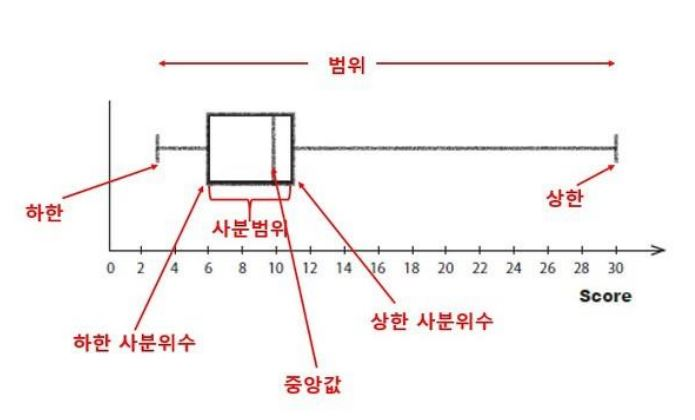



### 2.2.3 데이터의 지표 정리



In [34]:
# DataFrame이나 Series에서의 describe()메서드를 이용하여 다양한 지표를 한번에 구하기

pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## 2.3 데이터의 정규화

### 2.3.1 표준화 
##### 표준화 : 데이터를 통일된 지표로 변환하는 것


*   표준화 : 데이터에서 평균을 뺴고 표준편차로 나누는 작업
*   표준화 변량 / Z점수 : 표준화된 데이터
*   표준화된 데이터는 **평균이 0, 표준편차가 1**
*   표준화된 데이터는 단위가 없음(데이터의 단위를 쓰는 표준편차로 나눴기 때문)









In [35]:
# scores(시험점수)를 표준화하기

z = (scores - np.mean(scores)) / np.std(scores)     # 각 데이터와 평균의 차를 표준편차로 나눔
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [36]:
# 표준화된 데이터는 평균이 0, 표준편차가 1

np.mean(z), np.std(z, ddof=0)

(-0.000, 1.000)

### 2.3.2 편찻값

##### 편찻값 : 평균이 50, 표준편차가 10이 되도록 정규화 한 값


*  표준화된 데이터에 10을 곱하고 50을 더해서 구함




In [37]:
# 편찻값 구하기

z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [38]:
# DataFrame으로 정리해서 점수와 편찻값의 관계 알아보기
# 어떤 학생이 평균 성적을 얻었고, 어떤 학생이 우수한 성적을 얻었는지 확인 가능

scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


## 2.4 1차원 데이터의 시각화 



In [39]:
# 50명의 영어 점수를 사용해서 주요 지표들 확인

# 50명의 영어 점수 array
english_scores = np.array(df['english'])

# Series로 변환해서 describe표시
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

### 2.4.1 도수분포표
##### 도수분포표 : 분할된 구간과 데이터의 개수를 정리한 표


*   데이터의 분포 상태를 세부적으로 알고 싶을 때 사용
*   데이터가 취하는 값을 몇개의 구간으로 나누고, 각 구간에 몇 개의 데이터가 들어가는지 세는 방법
    * 계급 : 데이터를 나눈 하나의 구간      
    * 도수 : 각 계급에 속한 데이터의 수
    * 계급폭 : 각 구간의 폭
    * 계급수 : 계급의 수
* `np.histogram()`으로 도수분포표 생성
    * bin = 계급수
    * range = (최솟값, 최댓값) 





In [41]:
# 도수분포표 작성 - 계급의 수는 10, 최소값은 0, 최댓값은 100을 지정

freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [44]:
# 0~10, 10~20, ... 이라는 문자열 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]

# freq_class를 인덱스로 DataFrame 작성
freq_dist_df = pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0




*  계급값 : 각 계급을 대표하는 값 => 계급의 중앙값
*  상대도수 : 전체 데이터에 대해 해당 계급의 데이터가 어느 정도 비율을 차지하는지 나타내는 지표
    * 해당 계급의 도수 / 전체 도수의 합
* 누적상대도수 : 해당 계급까지의 상대도수 합
    * `np.cumsum()`메서드를 사용




In [45]:
# 계급값 구하기

class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [46]:
# 상대도수 구하기

rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [47]:
# 누적상대도수 구하기

cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [49]:
# 계급값, 상대도수, 누적상대도수를 도수분포표에 추가하기

freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [50]:
# 최빈값 재검토

freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']


65

### 2.4.2 히스토그램
##### 히스토그램 : 도수분포표를 표현한 막대그래프
* 데이터의 분포 상태를 더욱 시각적으로 파악 가능
* Matplotlib 라이브러리가 필요하므로 import해서 사용


In [51]:
# Matplotlib의 pyplot 모듈을 plt 이름으로 import

import matplotlib.pyplot as plt

#그래프가 jupyter notetbook 위에 표시

%matplotlib inline

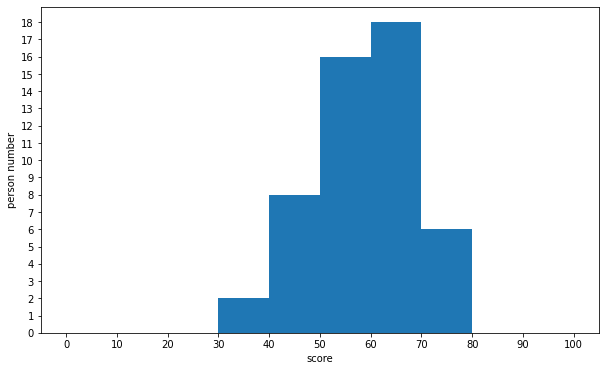

In [52]:
## 캔버스 생성
# figsize로 가로. 세로 크기 지정

fig = plt.figure(figsize=(10,6))

# 캔버스 위에 그래프를 그리기 위한 영역 지정
# 인수는 영역을 1X1개 지정, 하나의 영역에 그린다는 것을 의미

ax = fig.add_subplot(111)

# 계급수를 10으로 해서 히스토그램 그림

freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100))

# X축에 레이블 

ax.set_xlabel('score')

# Y축에 레이블

ax.set_ylabel('person number')

# X축을 0,10,20, ... , 100 눈금으로 구분

ax.set_xticks(np.linspace(0,100,10+1))

# Y축을 0,1,2, ... 의 눈금으로 구분

ax.set_yticks(np.arange(0, freq.max()+1))

#그래프 표시

plt.show()

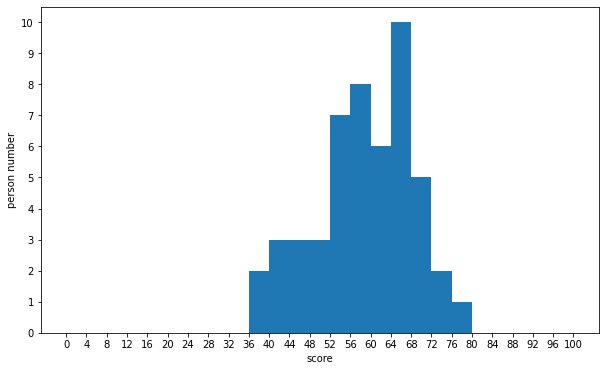

In [56]:
# 계급수를 늘려서 세부적인 데이터 분포 확인 
# 계급수를 25(계급폭을 4점으로 한 히스토그램 출력)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins = 25, range=(0,100))

ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

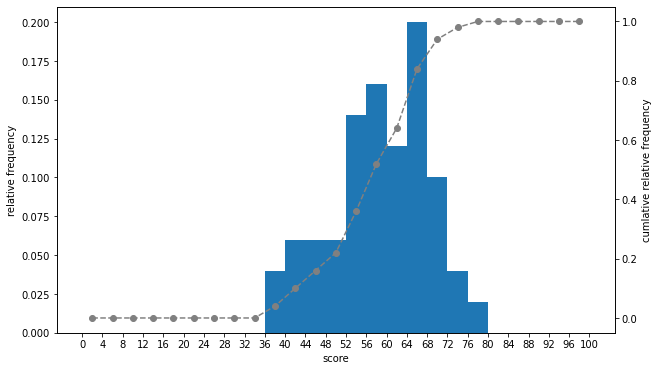

In [57]:
# 상대도수의 히스토그램을 누적상대도수의 꺾은선 그래프와 함께 나타내기

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)

# Y축의 스케줄이 다른 그래프를 ax1과 동일한 영역에 생성

ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hisst의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0,100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [ (i+(i+4))//2 for i in range(0,100,4)]

# 꺾은선 그래프 그리기
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그림
# 인수 color를 'gray'로 하면 회색으로 지정

ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')

# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumlative relative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()

### 2.4.3 상자그림
##### 상자그림 : 데이터의 산포도를 표현한 그림
* 데이터의 분포와 이상값을 시각적으로 파악 가능
* 분위수 범위의 Q1, Q2, Q3, IQR을 이용
    * 상자 : Q1부터 Q3을 나타냄
    * 수염 : Q1 - 1.5IQR부터 Q3 + 1.5IQR 
    * 상자와 수염에 들어가지 않는 값을 이상값으로 처리
* `boxplot()` 메서드를 이용해서 그림

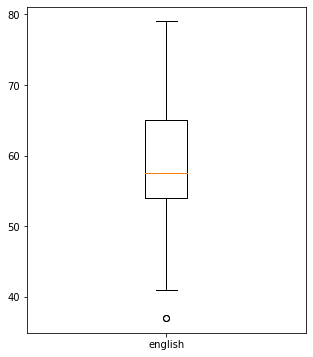

In [59]:
# 상자그림 만들기

fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()